TODOS:
1. Standartasation of hot encodeds,- I dont think we need it but maybe very at the end we can do it.
2. Generalisation error to linear regression -Done 

### Change the directory to the repository folder in your computer depends on wherever it is.

In [65]:
cd ~/Desktop/ML_project2

/Users/BotezatuCristian/Desktop/ML_project2


In [66]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

# PCA

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  del sys.path[0]


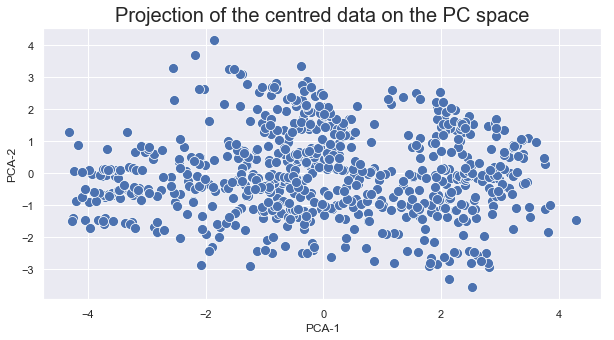

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
df = pd.read_excel('DataSet.xlsx')
df[-5:]

import matplotlib.pyplot as plt
from scipy.linalg import svd
import numpy as np
from datetime import date

X = df.as_matrix(columns=df.columns[df.columns!='Date'])
N = len(df.columns) -1

std = np.std(X, axis=0)
std = np.expand_dims(std,axis=0)

X = X/std
# Subtract mean value from data

Y = X - np.ones((N))*X.mean(axis=0)

# PCA by computing SVD of Y
U,S,V = svd(Y,full_matrices=False)
V = V.T

Z = Y @ V[:,:2]


data = pd.DataFrame({'PCA-1':Z[:,0],'PCA-2':Z[:,1]})  

ax = sns.scatterplot(x="PCA-1", y="PCA-2",
                      s=100, 
                     data=data)
ax.set_title('Projection of the centred data on the PC space', fontsize = 20)
sns.set(rc={'figure.figsize':(1,1)})
ax = ax.get_figure()
ax.savefig('projection_data.png')

In [68]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]
import pandas as pd
import numpy as np
df = pd.read_excel('DataSet.xlsx')

df = df[(df.temp<=1) & (df.temp>0) & (df.atemp<=1) & (df.atemp>=0) & (df.hum<=1) & (df.hum>=0) & (df.windspeed <=1) ]
orig_y = df['new']
df['new'] = np.log(((df['new'] - df['new'].mean()) / df['new'].std()).abs()).abs()
df['registered'] = np.log(((df['new'] - df['new'].mean()) / df['new'].std()).abs()).abs()
df['total'] = np.log(((df['new'] - df['new'].mean()) / df['new'].std()).abs()).abs()
df.head()

,ID,Date,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,new,registered,total
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,0.306379,0.495342,0.495342
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,0.024681,0.128730,0.128730
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,0.040063,0.145631,0.145631
3,4,2011-01-04,1,0,1,0,2,1,1,0.001389,0.212122,0.590435,0.160296,0.056578,0.164101,0.164101
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,0.083511,0.194974,0.194974


# Linear Model without generalisation

In [69]:
import numpy as np
from sklearn.linear_model import LinearRegression
sub_df = df[[ 'season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']]
cols = [ 'season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

for each in cols:
    dummies = pd.get_dummies(sub_df[each], prefix=each)
    sub_df = sub_df.drop(each, axis = 1)
    sub_df = pd.concat([ dummies, sub_df], axis=1)
    
sub_df = pd.concat([ df[['hum']], sub_df], axis=1)
sub_df = pd.concat([ df[['temp']], sub_df], axis=1)
sub_df = pd.concat([ df[['atemp']], sub_df], axis=1)
sub_df = pd.concat([ df[['windspeed']], sub_df], axis=1)
sub_df = pd.concat([ df[['new']], sub_df], axis=1)
sub_df = pd.concat([ df[['registered']], sub_df], axis=1)
sub_df = pd.concat([ df[['total']], sub_df], axis=1)

In [76]:
import math
pd.options.mode.chained_assignment = None
df1 = sub_df[['weathersit_1', 'weathersit_2', 'weathersit_3', 'workingday_0', 'workingday_1', 'windspeed', 'atemp', 'temp', 'hum',
            'mnth_1', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12',
            'season_1', 'season_2', 'season_3', 'season_4', 'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
            'weekday_6', 'holiday_0', 'holiday_1', 'new', 'registered', 'total']]
for i in ('weathersit_1', 'weathersit_2', 'weathersit_3'):
    df1[i] = (((df1[i] - df1[i].mean()) / df1[i].std()).abs())/math.sqrt(3)
for i in ('workingday_0', 'workingday_1'):
    df1[i] = (((df1[i] - df1[i].mean()) / df1[i].std()).abs())/math.sqrt(2)
for i in ('weekday_0', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6'):
    df1[i] = (((df1[i] - df1[i].mean()) / df1[i].std()).abs())/math.sqrt(7)
for i in ('holiday_0', 'holiday_1'):
    df1[i] = (((df1[i] - df1[i].mean()) / df1[i].std()).abs())/math.sqrt(2)
for i in ('mnth_1', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12'):
    df1[i] = (((df1[i] - df1[i].mean()) / df1[i].std()).abs())/math.sqrt(12)
for i in ('season_1', 'season_2', 'season_3', 'season_4'):
    df1[i] = (((df1[i] - df1[i].mean()) / df1[i].std()).abs())/math.sqrt(4)
sub_df1 = df1[['weathersit_1', 'weathersit_2', 'weathersit_3', 'workingday_0', 'workingday_1', 'windspeed', 'atemp', 'temp', 'hum',
            'mnth_1', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12',
            'season_1', 'season_2', 'season_3', 'season_4', 'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
            'weekday_6', 'holiday_0', 'holiday_1']]
X = sub_df1.as_matrix()
mat_data = X
y = sub_df[['new']].as_matrix().ravel()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


# Linear Model with Generalisation

In [78]:
from sklearn import linear_model

def get_ridge_lm(alpha = 0.1):
    reg = linear_model.Ridge (alpha = alpha).fit(X[:200], y[:200])
    return reg



['weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'holiday_0', 'holiday_1']
[0.09, 0.06, 0.1, -0.01, 0.0, -0.0, -0.0]


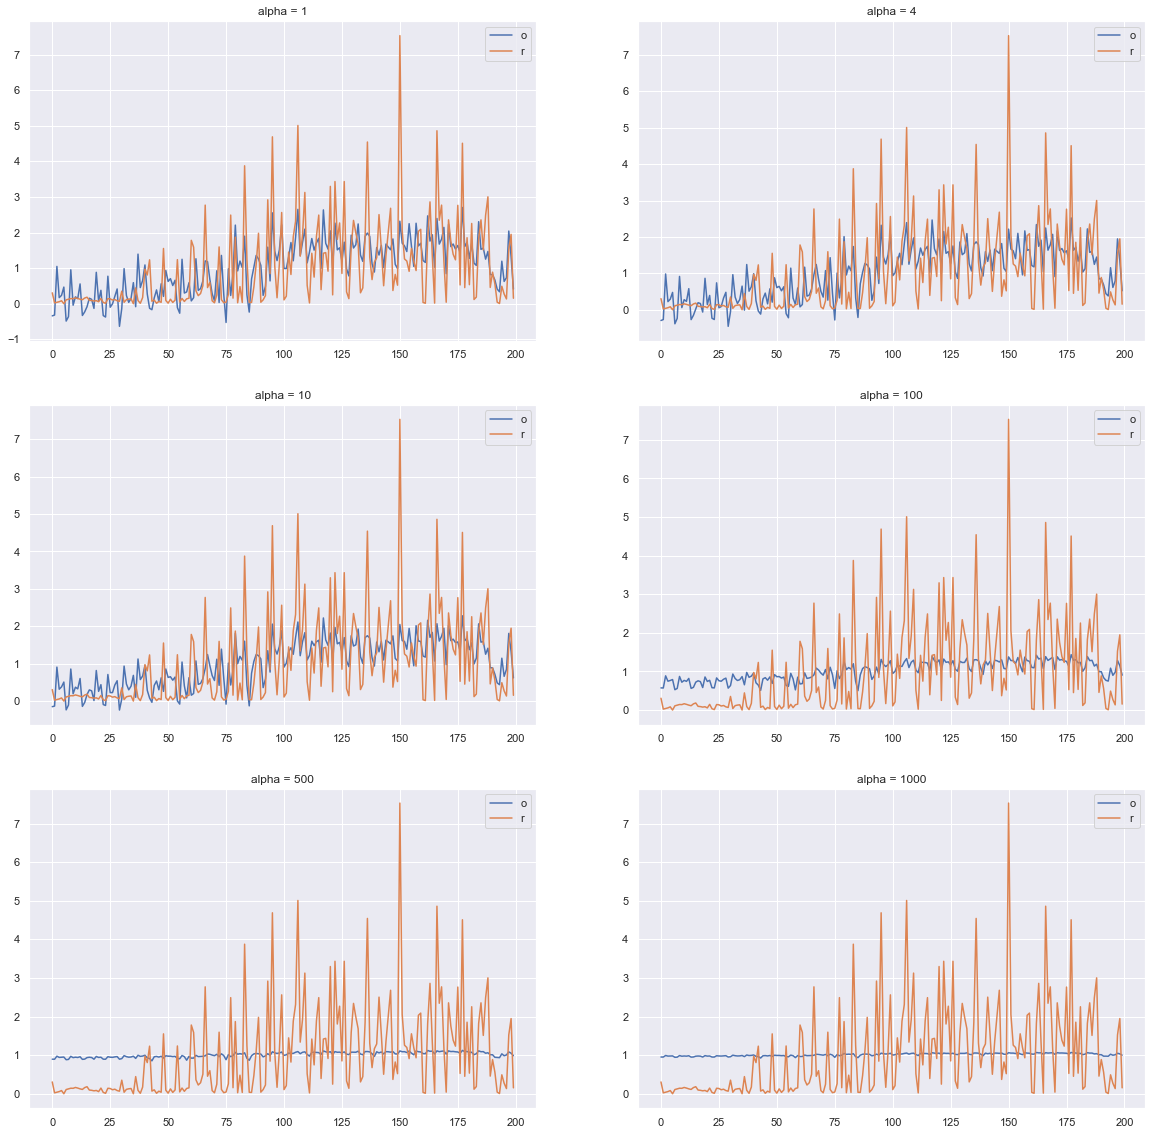

In [79]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 20]
from matplotlib.pyplot import  plot, legend


alphas = [1, 4, 10, 100, 500, 1000]
for i in range(6):
    plt.subplot(3, 2, i+1)
    predicted = plot(get_ridge_lm(alpha = int(alphas[i])).predict(X[:200]), label = 'predicted')
    legend('predicted')
    original = plot(y[:200], label = 'original')
    legend('original')
    title = 'alpha = ' + str(alphas[i])
    plt.title(title)

plt.savefig('predicted_and_original.png')

attributeNames = [name for name in list(sub_df)]

print(attributeNames[14:21])
print(list(np.around(get_ridge_lm(alpha = 100).coef_[14:21], decimals=2)))




# 2.Forward selection linear regression

['weathersit_1', 'weathersit_3', 'workingday_0', 'workingday_1', 'atemp', 'hum', 'mnth_1', 'mnth_2', 'mnth_10', 'season_1']
[-0.086 -0.085 -0.081 -0.081  0.252 -0.097 -0.062 -0.081  0.089 -0.061]
Cross validation fold 1/5
Features no: 10

['workingday_1', 'atemp', 'hum', 'mnth_2']
[-0.11   0.31  -0.153 -0.106]
Cross validation fold 2/5
Features no: 4

['weathersit_3', 'workingday_1', 'atemp', 'hum', 'mnth_10', 'season_1', 'weekday_1']
[-0.088 -0.135  0.3   -0.135  0.106 -0.076  0.115]
Cross validation fold 3/5
Features no: 7

['weathersit_1', 'weathersit_3', 'workingday_0', 'atemp', 'hum', 'mnth_2', 'mnth_5', 'mnth_10']
[-0.063 -0.082 -0.14   0.307 -0.078 -0.079  0.083  0.119]
Cross validation fold 4/5
Features no: 8

['weathersit_3', 'workingday_0', 'atemp', 'mnth_1', 'mnth_2', 'mnth_11', 'mnth_12', 'weekday_1', 'weekday_6']
[-0.1   -0.04   0.263 -0.107 -0.12  -0.065 -0.058  0.088 -0.033]
Cross validation fold 5/5
Features no: 9



Linear regression without feature selection:

- Train

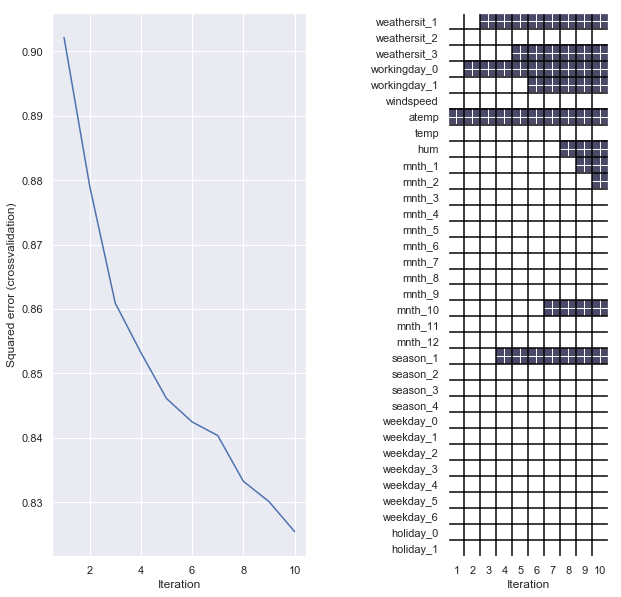

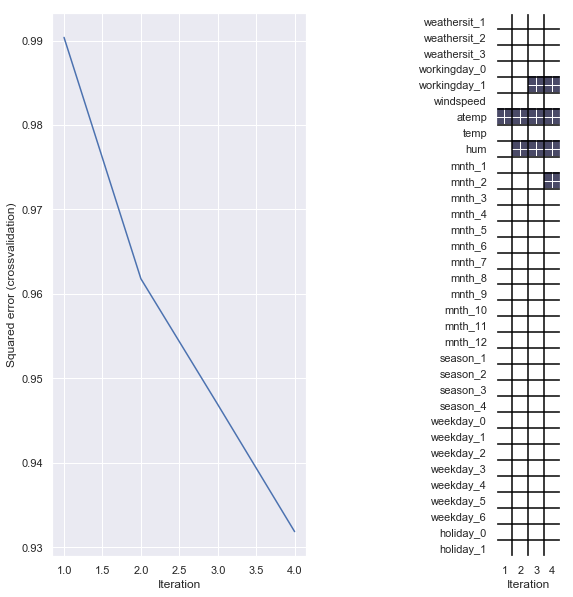

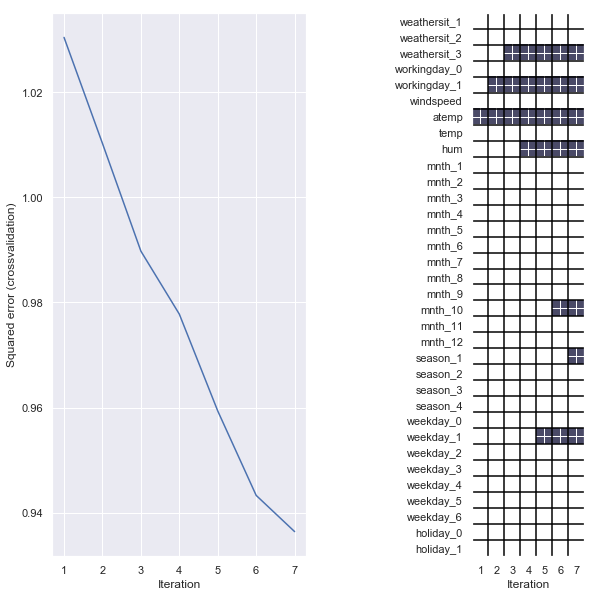

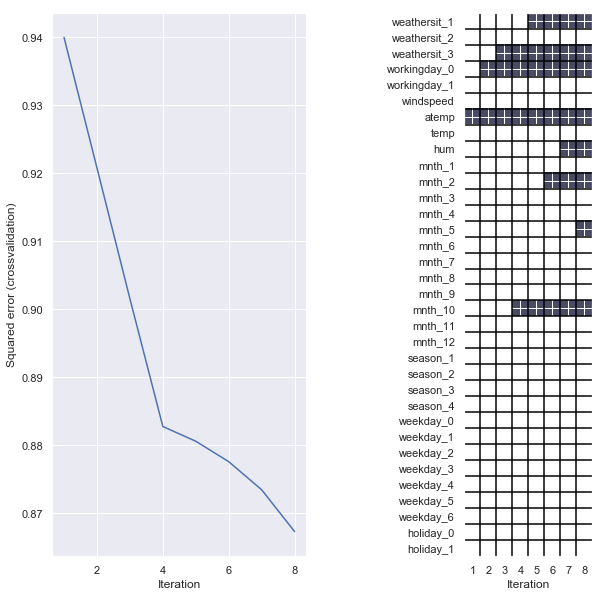

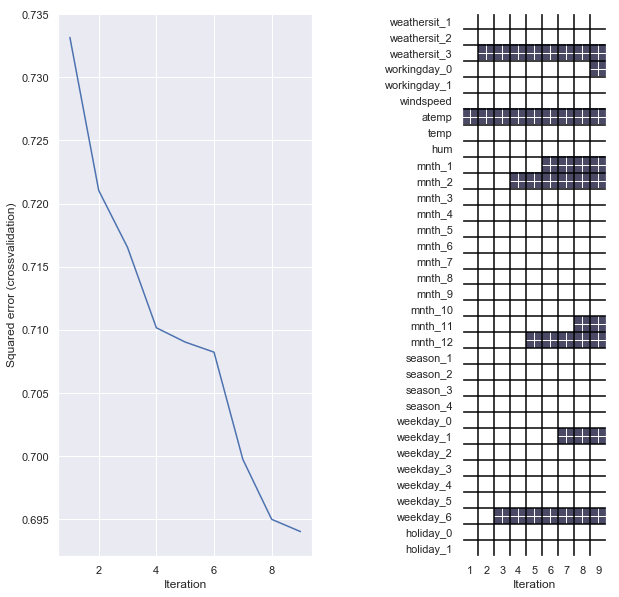

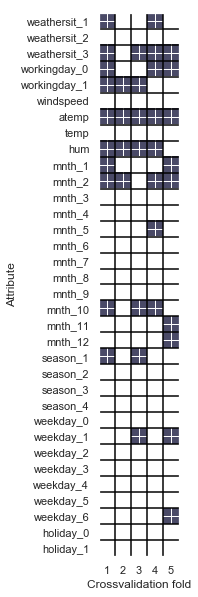

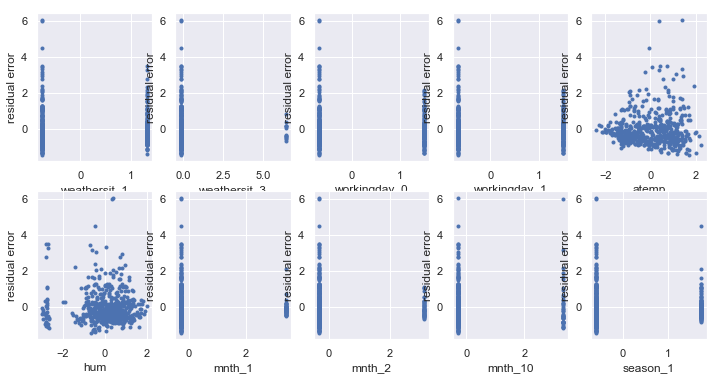

Ran Exercise 6.2.1


In [83]:
# exercise 6.2.1
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]
from matplotlib.pyplot import figure, plot, subplot, title, xlabel, ylabel, show, clim, savefig
from scipy.io import loadmat
import sklearn.linear_model as lm
from sklearn import model_selection
from Tools.toolbox_02450 import feature_selector_lr, bmplot
import numpy as np

# Load data from matlab file
#mat_data = X
#y = X[:,-3].squeeze()
attributeNames = [name for name in list(sub_df1)]
N, M = X.shape


## Crossvalidation
# Create crossvalidation partition for evaluation
K = 5
CV = model_selection.KFold(n_splits=K,shuffle=True)

# Initialize variables
Features = np.zeros((M,K))
Error_train = np.empty((K,1))
Error_test = np.empty((K,1))
Error_train_fs = np.empty((K,1))
Error_test_fs = np.empty((K,1))
Error_train_nofeatures = np.empty((K,1))
Error_test_nofeatures = np.empty((K,1))

k=0
for train_index, test_index in CV.split(X):
    
    # extract training and test set for current CV fold
    X_train = X[train_index,:]
    y_train = y[train_index]
    X_test = X[test_index,:]
    y_test = y[test_index]
    internal_cross_validation = 10
    
    # Compute squared error without using the input data at all
    Error_train_nofeatures[k] = np.square(y_train-y_train.mean()).sum()/y_train.shape[0]
    Error_test_nofeatures[k] = np.square(y_test-y_test.mean()).sum()/y_test.shape[0]

    # Compute squared error with all features selected (no feature selection)
    m = lm.Ridge (fit_intercept=True, alpha = 100).fit(X_train, y_train)
    
#     m = lm.LinearRegression(fit_intercept=True).fit(X_train, y_train)
    Error_train[k] = np.square(y_train-m.predict(X_train)).sum()/y_train.shape[0]
    Error_test[k] = np.square(y_test-m.predict(X_test)).sum()/y_test.shape[0]

    # Compute squared error with feature subset selection
    #textout = 'verbose';
    textout = '';
    selected_features, features_record, loss_record = feature_selector_lr(X_train, y_train, internal_cross_validation, display=textout)
    
    Features[selected_features,k]=1
    # .. alternatively you could use module sklearn.feature_selection
    if len(selected_features) is 0:
        print('No features were selected, i.e. the data (X) in the fold cannot describe the outcomes (y).' )
    else:
        m = lm.Ridge (fit_intercept=True, alpha = 100).fit(X_train[:,selected_features], y_train)
        
        some_features = [attributeNames[int(el)] for el in selected_features]
        print(some_features)
        some_coefs = m.coef_
        some_coefs = np.around(some_coefs, decimals=3)
        print(some_coefs)
#         m = lm.LinearRegression(fit_intercept=True).fit(X_train[:,selected_features], y_train)
        Error_train_fs[k] = np.square(y_train-m.predict(X_train[:,selected_features])).sum()/y_train.shape[0]
        Error_test_fs[k] = np.square(y_test-m.predict(X_test[:,selected_features])).sum()/y_test.shape[0]
    
        figure(k)
        subplot(1,2,1)
        plot(range(1,len(loss_record)), loss_record[1:])
        xlabel('Iteration')
        ylabel('Squared error (crossvalidation)')    
        plt.savefig('MSE_cross_validation.png')
        
        subplot(1,3,3)
        bmplot(attributeNames, range(1,features_record.shape[1]), -features_record[:,1:])
        clim(-1.5,0)
        xlabel('Iteration')

    print('Cross validation fold {0}/{1}'.format(k+1,K))
#     print('Train indices: {0}'.format(train_index))
#     print('Test indices: {0}'.format(test_index))
    print('Features no: {0}\n'.format(selected_features.size))

    k+=1


# Display results
print('\n')
print('Linear regression without feature selection:\n')
print('- Training error: {0}'.format(Error_train.mean()))
print('- Test error:     {0}'.format(Error_test.mean()))
print('- R^2 train:     {0}'.format((Error_train_nofeatures.sum()-Error_train.sum())/Error_train_nofeatures.sum()))
print('- R^2 test:     {0}'.format((Error_test_nofeatures.sum()-Error_test.sum())/Error_test_nofeatures.sum()))
print('Linear regression with feature selection:\n')
print('- Training error: {0}'.format(Error_train_fs.mean()))
print('- Test error:     {0}'.format(Error_test_fs.mean()))
print('- R^2 train:     {0}'.format((Error_train_nofeatures.sum()-Error_train_fs.sum())/Error_train_nofeatures.sum()))
print('- R^2 test:     {0}'.format((Error_test_nofeatures.sum()-Error_test_fs.sum())/Error_test_nofeatures.sum()))

figure(k)
subplot(1,3,2)
bmplot(attributeNames, range(1,Features.shape[1]+1), -Features)
clim(-1.5,0)
xlabel('Crossvalidation fold')
ylabel('Attribute')
plt.savefig('forward_selection2.png')

# Inspect selected feature coefficients effect on the entire dataset and
# plot the fitted model residual error as function of each attribute to
# inspect for systematic structure in the residual

f=1 # cross-validation fold to inspect
ff=Features[:,f-1].nonzero()[0]
if len(ff) is 0:
    print('\nNo features were selected, i.e. the data (X) in the fold cannot describe the outcomes (y).' )
else:
    m = lm.Ridge (fit_intercept=True, alpha = 100).fit(X[:,ff], y)
#     m = lm.LinearRegression(fit_intercept=True).fit(X[:,ff], y)
    
    y_est= m.predict(X[:,ff])
    residual=y-y_est
    
    figure(k+1, figsize=(12,6))
    title('Residual error vs. Attributes for features selected in cross-validation fold {0}'.format(f))
    for i in range(0,len(ff)):
       subplot(2,np.ceil(len(ff)/2.0),i+1)
       plot(X[:,ff[i]],residual,'.')
       xlabel(attributeNames[ff[i]])
       ylabel('residual error')
    
savefig('Forward_selection.png')
show()

print('Ran Exercise 6.2.1')


Crossvalidation fold: 1/10
Training network 1/4...
Epoch: 5; Error: 21.5653341925904;
Epoch: 10; Error: 18.69639995544303;
Epoch: 15; Error: 15.519649988163497;
Epoch: 20; Error: 12.533710815271629;
Epoch: 25; Error: 6.543412418118693;
Epoch: 30; Error: 5.25044678499864;
Epoch: 35; Error: 4.607109761898032;
Epoch: 40; Error: 4.391844906397493;
Epoch: 45; Error: 4.339603570173022;
Epoch: 50; Error: 4.222377981468746;
Epoch: 55; Error: 4.060972549031231;
Epoch: 60; Error: 3.888918864031161;
The maximum number of train epochs is reached
Epoch: 5; Error: 16.686351870613954;
Epoch: 10; Error: 12.46491021166099;
Epoch: 15; Error: 10.57601693644868;
Epoch: 20; Error: 10.041918047376486;
Epoch: 25; Error: 9.826173148432833;
Epoch: 30; Error: 9.75448495893986;
Epoch: 35; Error: 9.650480763788917;
Epoch: 40; Error: 9.476751149328793;
Epoch: 45; Error: 9.383838579599884;
Epoch: 50; Error: 9.320486793662823;
Epoch: 55; Error: 9.304860619596232;
Epoch: 60; Error: 9.282658459917117;
The maximum num

Epoch: 30; Error: 6.353037645561946;
Epoch: 35; Error: 6.235819542100544;
Epoch: 40; Error: 6.223985237589444;
Epoch: 45; Error: 6.135204164271197;
Epoch: 50; Error: 6.094480745475341;
Epoch: 55; Error: 6.089161250498816;
Epoch: 60; Error: 6.08790384022733;
The maximum number of train epochs is reached
Epoch: 5; Error: 11.68915117487722;
Epoch: 10; Error: 9.51708669054743;
Epoch: 15; Error: 9.062364616492141;
Epoch: 20; Error: 8.517332468543245;
Epoch: 25; Error: 8.186749570640647;
Epoch: 30; Error: 8.156517261575845;
Epoch: 35; Error: 8.153187641615753;
Epoch: 40; Error: 8.14516668926101;
Epoch: 45; Error: 8.109633376087821;
Epoch: 50; Error: 8.103914821883013;
Epoch: 55; Error: 8.103594435868066;
Epoch: 60; Error: 8.103106511809788;
The maximum number of train epochs is reached
Epoch: 5; Error: 9.185444381558838;
Epoch: 10; Error: 7.984833124345185;
Epoch: 15; Error: 7.891288070595462;
Epoch: 20; Error: 7.829285991600954;
Epoch: 25; Error: 7.827235305793272;
Epoch: 30; Error: 7.82642

Epoch: 15; Error: 3.459898993143524;
Epoch: 20; Error: 2.6382296271583145;
Epoch: 25; Error: 1.444433412412156;
The goal of learning is reached
Epoch: 5; Error: 8.06335601520844;
Epoch: 10; Error: 5.179835101155456;
Epoch: 15; Error: 4.730404184694774;
Epoch: 20; Error: 4.27907495045851;
Epoch: 25; Error: 3.662101486214053;
Epoch: 30; Error: 2.703363902730365;
Epoch: 35; Error: 1.9436540986721893;
Epoch: 40; Error: 1.5946403603811432;
Epoch: 45; Error: 1.4603364800559502;
Epoch: 50; Error: 1.2925923070950285;
Epoch: 55; Error: 1.1249077731980963;
Epoch: 60; Error: 1.0225045625614273;
The maximum number of train epochs is reached
Epoch: 5; Error: 14.132276580378418;
Epoch: 10; Error: 5.850586364832983;
Epoch: 15; Error: 2.566537996426711;
Epoch: 20; Error: 1.567302582928888;
Epoch: 25; Error: 1.3827581121351193;
Epoch: 30; Error: 1.3355018975568076;
Epoch: 35; Error: 1.2942884197933693;
Epoch: 40; Error: 1.2741831314089387;
Epoch: 45; Error: 1.2611398694557994;
Epoch: 50; Error: 1.24660

Epoch: 5; Error: 16.919971274211488;
Epoch: 10; Error: 13.94411355221705;
Epoch: 15; Error: 12.236682507480204;
Epoch: 20; Error: 11.843375497131177;
Epoch: 25; Error: 11.3993390099713;
Epoch: 30; Error: 10.851251525960581;
Epoch: 35; Error: 10.164414055619769;
Epoch: 40; Error: 9.49058186485961;
Epoch: 45; Error: 9.304511711919595;
Epoch: 50; Error: 8.920131373776144;
Epoch: 55; Error: 8.434060607668512;
Epoch: 60; Error: 8.265755098143295;
The maximum number of train epochs is reached
Epoch: 5; Error: 8.750269196784382;
Epoch: 10; Error: 7.099233801791778;
Epoch: 15; Error: 6.524487352594768;
Epoch: 20; Error: 6.254004758847525;
Epoch: 25; Error: 6.160615536668345;
Epoch: 30; Error: 6.052831679820741;
Epoch: 35; Error: 5.97003992547973;
Epoch: 40; Error: 5.651666487017467;
Epoch: 45; Error: 4.394636993732939;
Epoch: 50; Error: 3.9427604968275896;
Epoch: 55; Error: 3.826694986415089;
Epoch: 60; Error: 3.808187247704176;
The maximum number of train epochs is reached
Epoch: 5; Error: 7.

Epoch: 5; Error: 12.251261536954392;
Epoch: 10; Error: 11.495759401970641;
Epoch: 15; Error: 11.487541644376593;
Epoch: 20; Error: 11.42262663745311;
Epoch: 25; Error: 11.41709892555411;
Epoch: 30; Error: 11.412933026182268;
Epoch: 35; Error: 11.397330607050309;
Epoch: 40; Error: 11.374194293623013;
Epoch: 45; Error: 11.372099632951477;
Epoch: 50; Error: 11.369843338506683;
Epoch: 55; Error: 11.369791549691497;
Epoch: 60; Error: 11.369667771307988;
The maximum number of train epochs is reached
Training network 2/4...
Epoch: 5; Error: 16.83367565410047;
Epoch: 10; Error: 14.166036788144819;
Epoch: 15; Error: 13.076219725828352;
Epoch: 20; Error: 11.978461116290053;
Epoch: 25; Error: 9.793948385931767;
Epoch: 30; Error: 7.651301675768911;
Epoch: 35; Error: 4.6349821065143315;
Epoch: 40; Error: 2.912084257708274;
Epoch: 45; Error: 2.5003714188984407;
Epoch: 50; Error: 2.3607287501977723;
Epoch: 55; Error: 2.199290348894265;
Epoch: 60; Error: 2.133816882617574;
The maximum number of train 

The maximum number of train epochs is reached
Training network 3/4...
Epoch: 5; Error: 23.729081802686835;
Epoch: 10; Error: 19.312303285406365;
Epoch: 15; Error: 11.627669770043706;
Epoch: 20; Error: 7.351693699274837;
Epoch: 25; Error: 3.7611698090142953;
Epoch: 30; Error: 2.165131448272241;
Epoch: 35; Error: 1.555134381060151;
Epoch: 40; Error: 1.241376898667964;
Epoch: 45; Error: 0.9466170490570813;
The goal of learning is reached
Epoch: 5; Error: 19.93977980399127;
Epoch: 10; Error: 12.186336100249816;
Epoch: 15; Error: 8.647872504507871;
Epoch: 20; Error: 5.847624361751259;
Epoch: 25; Error: 3.446921458012774;
Epoch: 30; Error: 2.1768228326740475;
Epoch: 35; Error: 1.5395329474214579;
Epoch: 40; Error: 1.1391699961197967;
The goal of learning is reached
Epoch: 5; Error: 19.729140284025654;
Epoch: 10; Error: 10.569733524947575;
Epoch: 15; Error: 5.226154659214095;
Epoch: 20; Error: 3.5596713246105627;
Epoch: 25; Error: 2.373994887065898;
Epoch: 30; Error: 1.4215867211744033;
Epoch

Epoch: 35; Error: 2.0516430635973;
Epoch: 40; Error: 2.040312813428823;
Epoch: 45; Error: 1.9875543071084807;
Epoch: 50; Error: 1.9123430310170109;
Epoch: 55; Error: 1.8224355932081582;
Epoch: 60; Error: 1.8067486797618233;
The maximum number of train epochs is reached
Epoch: 5; Error: 15.933168517983784;
Epoch: 10; Error: 11.479657984385925;
Epoch: 15; Error: 10.468383024910668;
Epoch: 20; Error: 9.836872491037042;
Epoch: 25; Error: 9.620364750276137;
Epoch: 30; Error: 9.419827958558866;
Epoch: 35; Error: 9.294653282026015;
Epoch: 40; Error: 9.26613003592268;
Epoch: 45; Error: 9.245544887182442;
Epoch: 50; Error: 9.228547903375386;
Epoch: 55; Error: 9.210177785196066;
Epoch: 60; Error: 9.191047544198394;
The maximum number of train epochs is reached
Epoch: 5; Error: 9.87974127512219;
Epoch: 10; Error: 9.80518076445266;
Epoch: 15; Error: 9.78919682420079;
Epoch: 20; Error: 9.785430422803941;
Epoch: 25; Error: 9.776649001191837;
Epoch: 30; Error: 9.775255133890846;
Epoch: 35; Error: 9.7

Epoch: 30; Error: 1.3398170639334648;
The goal of learning is reached
Epoch: 5; Error: 4.673445437866326;
Epoch: 10; Error: 4.116986984403636;
Epoch: 15; Error: 3.8513519648407413;
Epoch: 20; Error: 3.728613770994356;
Epoch: 25; Error: 3.6904773746033;
Epoch: 30; Error: 3.672230232082389;
Epoch: 35; Error: 3.617410769158234;
Epoch: 40; Error: 3.528715607936365;
Epoch: 45; Error: 3.5105275441044763;
Epoch: 50; Error: 3.49810506162833;
Epoch: 55; Error: 3.4905911262939897;
Epoch: 60; Error: 3.474302963361809;
The maximum number of train epochs is reached
Epoch: 5; Error: 5.90520868602732;
Epoch: 10; Error: 5.052410416940523;
Epoch: 15; Error: 4.577136041611215;
Epoch: 20; Error: 3.8467596118521583;
Epoch: 25; Error: 3.7837567662994918;
Epoch: 30; Error: 3.7390445137942154;
Epoch: 35; Error: 3.7143027912168165;
Epoch: 40; Error: 3.68337843070647;
Epoch: 45; Error: 3.6489470709717353;
Epoch: 50; Error: 3.614380194669256;
Epoch: 55; Error: 3.5767317226472257;
Epoch: 60; Error: 3.52764090090

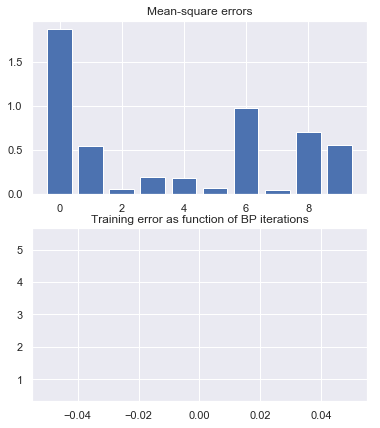

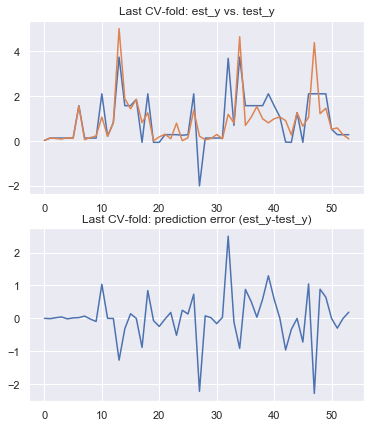

Ran Exercise 8.2.6


In [100]:
# exercise 8.2.6

from matplotlib.pyplot import figure, plot, subplot, title, show, bar
import numpy as np
from scipy.io import loadmat
import neurolab as nl
from sklearn import model_selection
from scipy import stats

# Load data from matlab file
# mat_data = X
# y = X[:,-3].squeeze()

attributeNames = [name for name in list(sub_df1)]
N, M = X.shape
C = 2

# Normalize data
X = stats.zscore(X);
                
## Normalize and compute PCA (UNCOMMENT to experiment with PCA preprocessing)
Y = stats.zscore(X,0);
U,S,V = np.linalg.svd(Y,full_matrices=False)
V = V.T
#Components to be included as features
k_pca = 3
X = X @ V[:,0:k_pca]
N, M = X.shape


# Parameters for neural network classifier
n_hidden_units = [ 4, 8, 16, 32]     # number of hidden units
n_train = len(n_hidden_units)             # number of networks trained in each k-fold
learning_goal = 1     # stop criterion 1 (train mse to be reached)
max_epochs = 64         # stop criterion 2 (max epochs in training)
show_error_freq = 5     # frequency of training status updates

# K-fold crossvalidation
K = 10                   # only three folds to speed up this example
CV = model_selection.KFold(K,shuffle=True)

# Variable for classification error
errors = np.zeros(K)*np.nan
error_hist = np.zeros((max_epochs,K))*np.nan
bestnet = list()
best_errors = list()
best_hidden_n_list = list()
k=0


def ann_CV(X,y,ann,cvf=10):
    ''' Validate linear regression model using 'cvf'-fold cross validation.
        The loss function computed as mean squared error on validation set (MSE).
        Function returns MSE averaged over 'cvf' folds.

        Parameters:
        X       training data set
        y       vector of values
        cvf     number of crossvalidation folds        
    '''
    y = y.squeeze()
    CV = model_selection.KFold(n_splits=cvf, shuffle=True)
    validation_error=np.empty(cvf)
    f=0
    for train_index, test_index in CV.split(X):
        X_train = X[train_index]
        y_train = y[train_index]
        X_test = X[test_index]
        y_test = y[test_index]
        m = ann.train(X_train, y_train.reshape(-1,1), goal=learning_goal, epochs=max_epochs, show=show_error_freq)
        m2 = linear_model.Ridge(fit_intercept=True, alpha = 100).fit(X_train, y_train)
        validation_error[f] = np.square(y_test-ann.sim(X_test).squeeze()).sum()/y_test.shape[0]
        f=f+1
        
        
    return validation_error.mean()
    

for train_index, test_index in CV.split(X,y):
    print('\nCrossvalidation fold: {0}/{1}'.format(k+1,K))    
    
    # extract training and test set for current CV fold
    X_train = X[train_index,:]
    y_train = y[train_index]
    X_test = X[test_index,:]
    y_test = y[test_index]
    
    best_train_error = np.inf
    best_hidden_n = None
    for i in range(n_train):
        print('Training network {0}/{1}...'.format(i+1,n_train))
        # Create randomly initialized network with 2 layers
        ann = nl.net.newff([[-3, 3]]*M, [n_hidden_units[i], 1], [nl.trans.TanSig(),nl.trans.PureLin()])
        if i==0:
            bestnet.append(ann)
        # train network
        train_error = ann_CV(X_test, y_test, ann, cvf = 4)
        if train_error<best_train_error:
            bestnet[k]=ann
            best_train_error = train_error
            best_hidden_n = n_hidden_units[i]
            error_hist[range(1),k] = train_error
    print('BEST HIDDEN UNIT AMOUNT: {0}...'.format(best_hidden_n))
    best_hidden_n_list.append(best_hidden_n)
    best_errors.append(best_train_error)
    print('Best train error: {0}...'.format(best_train_error))
    y_est = bestnet[k].sim(X_test).squeeze()
    errors[k] = np.power(y_est-y_test,2).sum().astype(float)/y_test.shape[0]
    k+=1
    #break

# Print the average least squares error
print('Mean-square error: {0}'.format(np.mean(errors)))

figure(figsize=(6,7));
subplot(2,1,1); bar(range(0,K),errors); title('Mean-square errors');
subplot(2,1,2); plot(error_hist); title('Training error as function of BP iterations');
figure(figsize=(6,7));
subplot(2,1,1); plot(y_est); plot(y_test); title('Last CV-fold: est_y vs. test_y'); 
subplot(2,1,2); plot((y_est-y_test)); title('Last CV-fold: prediction error (est_y-test_y)'); 
savefig('ann_regression.png')
show()

print('Ran Exercise 8.2.6')

#% The weights if the network can be extracted via
#bestnet[0].layers[0].np['w'] # Get the weights of the first layer
#bestnet[0].layers[0].np['b'] # Get the bias of the first layer


In [208]:
best_hidden_n_list, best_errors

([4, 8, 4, 8, 4, 4, 8, 4, 4, 16],
 [0.007206181866184377,
  0.03463106672281485,
  0.012160652510853003,
  0.04207206452192144,
  0.04035073327336958,
  0.010495021840206113,
  0.024162779593186322,
  0.024061975948533793,
  0.01919048229228141,
  0.03175065723738428])